<a href="https://colab.research.google.com/github/AUT-Student/NN-HW1/blob/main/NN_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.metrics import accuracy_score

# Loading

In [2]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
To: /content/crx.data
100% 32.2k/32.2k [00:00<00:00, 252kB/s]


In [3]:
data = pd.read_csv("/content/crx.data", header=None,
                   names=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"])

In [4]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Preprocessing

In [6]:
def convert_question_mark(value):
  if value == "?":
    return None
  else:
    return value

In [7]:
data = data.applymap(convert_question_mark)

In [8]:
continues_columns = ["A2", "A3", "A8", "A11", "A14", "A15"]
discreate_columns = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13", "A16"]
feature_columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

In [9]:
data[continues_columns] = data[continues_columns].astype(float)
data[continues_columns] = data[continues_columns].fillna(data[continues_columns].mean())
#data[continues_columns] = (data[continues_columns]-data[continues_columns].mean())/data[continues_columns].std()

In [10]:
data[discreate_columns] = data[discreate_columns].fillna(data[discreate_columns].mode().iloc[0])
data[discreate_columns] = data[discreate_columns].apply(lambda col:pd.Categorical(col).codes)

In [11]:
data[feature_columns] = (data[feature_columns]-data[feature_columns].mean())/data[feature_columns].std()

In [12]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0.660958,-0.062276,-0.955920,-0.542556,-0.559093,1.470327,0.757329,-0.290872,0.953958,1.156306,-0.287892,-0.918529,-0.316941,0.104469,-0.195272,0
1,-1.510762,2.286443,-0.060007,-0.542556,-0.559093,1.003664,-0.835832,0.244013,0.953958,1.156306,0.740293,-0.918529,-0.316941,-0.819095,-0.087788,0
2,-1.510762,-0.596305,-0.855481,-0.542556,-0.559093,1.003664,-0.835832,-0.216167,0.953958,-0.863570,-0.493529,-0.918529,-0.316941,0.557537,-0.037117,0
3,0.660958,-0.315370,-0.646569,-0.542556,-0.559093,1.470327,0.757329,0.456175,0.953958,1.156306,0.534656,1.087120,-0.316941,-0.488006,-0.194696,0
4,0.660958,-0.961605,0.174015,-0.542556,-0.559093,1.470327,0.757329,-0.153415,0.953958,-0.863570,-0.493529,-0.918529,3.268131,-0.371835,-0.195272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.660958,-0.884833,1.069928,1.782685,1.793190,-0.396325,-0.835832,-0.290872,-1.046745,-0.863570,-0.493529,-0.918529,-0.316941,0.441366,-0.195272,1
686,-1.510762,-0.750693,-0.805262,-0.542556,-0.559093,-1.096320,0.757329,-0.066758,-1.046745,1.156306,-0.082255,1.087120,-0.316941,0.092851,-0.119649,1
687,-1.510762,-0.533032,1.755924,1.782685,1.793190,-0.162994,-1.234123,-0.066758,-1.046745,1.156306,-0.287892,1.087120,-0.316941,0.092851,-0.195080,1
688,0.660958,-1.151426,-0.914740,-0.542556,-0.559093,-1.329652,0.757329,-0.652442,-1.046745,-0.863570,-0.493529,-0.918529,-0.316941,0.557537,-0.051321,1


In [13]:
data.isna().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
A16    False
dtype: bool

# Shuffling and Splitting

In [14]:
train_data, valid_data, test_data = np.split(data.sample(frac=1, random_state=0), [int(.7*len(data)), int(.8*len(data))])

In [15]:
X_train = train_data[feature_columns]
Y_train = train_data["A16"]

X_valid = valid_data[feature_columns]
Y_valid = valid_data["A16"]

X_test = test_data[feature_columns]
Y_test = test_data["A16"]

# Plotting ( Linearly Seprable? )

## Pair of features

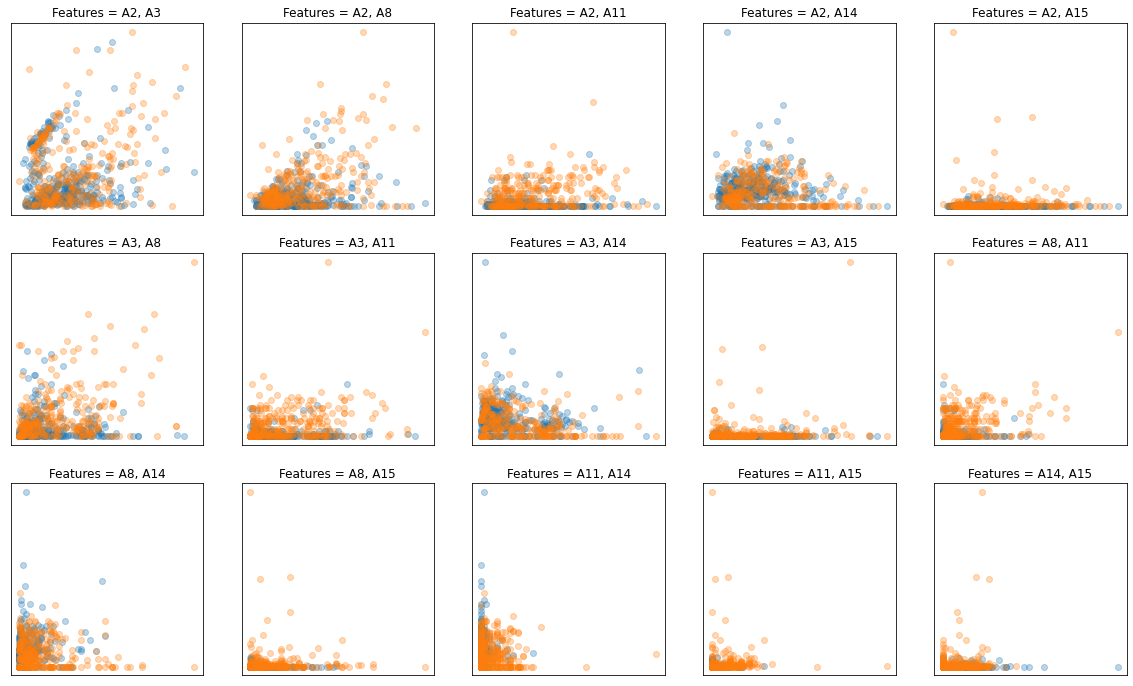

In [15]:
features_pair = []

for i, f1 in enumerate(continues_columns):
  for j, f2 in enumerate(continues_columns):
    if i < j:
      features_pair.append([f1, f2])


fig, ax = plt.subplots(3, 5)

for i, pair in enumerate(features_pair):
  ax[int(i/5)][i%5].scatter(data[data["A16"]==1][pair[0]], data[data["A16"]==1][pair[1]], alpha=0.3)
  ax[int(i/5)][i%5].scatter(data[data["A16"]==0][pair[0]], data[data["A16"]==0][pair[1]], alpha=0.3)
  ax[int(i/5)][i%5].title.set_text(f"Features = {pair[0]}, {pair[1]}")
  ax[int(i/5)][i%5].set_xticks([])
  ax[int(i/5)][i%5].set_yticks([])

fig.set_size_inches(20, 12)
fig.show()

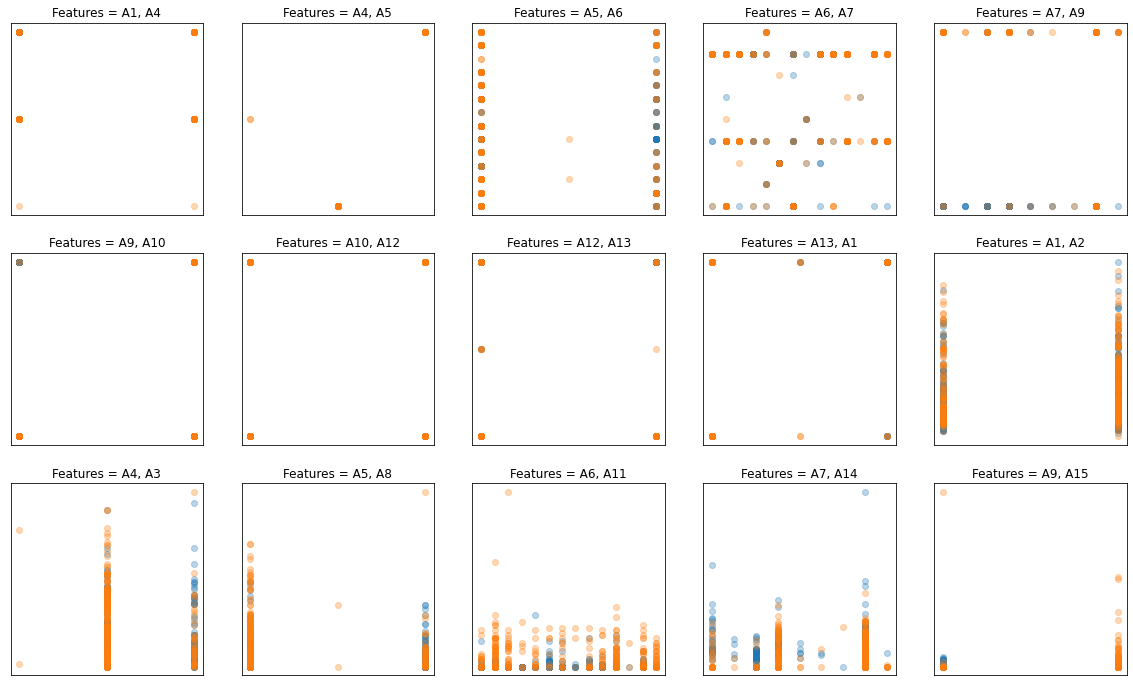

In [16]:
continues_columns = ["A2", "A3", "A8", "A11", "A14", "A15"]
discreate_columns = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13"]

features_pair = [["A1", "A4"], ["A4", "A5"], ["A5", "A6"], ["A6", "A7"], ["A7", "A9"],
                 ["A9", "A10"], ["A10", "A12"], ["A12", "A13"], ["A13", "A1"],
                 ["A1", "A2"], ["A4", "A3"], ["A5", "A8"], ["A6", "A11"], ["A7", "A14"], ["A9", "A15"]]

fig, ax = plt.subplots(3, 5)

for i, pair in enumerate(features_pair):
  ax[int(i/5)][i%5].scatter(data[data["A16"]==1][pair[0]], data[data["A16"]==1][pair[1]], alpha=0.3)
  ax[int(i/5)][i%5].scatter(data[data["A16"]==0][pair[0]], data[data["A16"]==0][pair[1]], alpha=0.3)
  ax[int(i/5)][i%5].title.set_text(f"Features = {pair[0]}, {pair[1]}")
  ax[int(i/5)][i%5].set_xticks([])
  ax[int(i/5)][i%5].set_yticks([])

fig.set_size_inches(20, 12)
fig.show()

## PCA

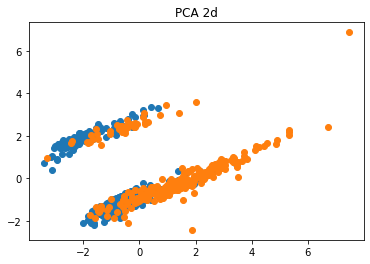

In [17]:
pca = PCA(n_components=2)
pca.fit(data.drop(columns=["A16"]))

data_t = pca.transform(data[data["A16"]==1].drop(columns=["A16"]))
plt.scatter(data_t[:,0], data_t[:,1])

data_t = pca.transform(data[data["A16"]==0].drop(columns=["A16"]))
plt.scatter(data_t[:,0], data_t[:,1])

plt.title("PCA 2d")
plt.show()

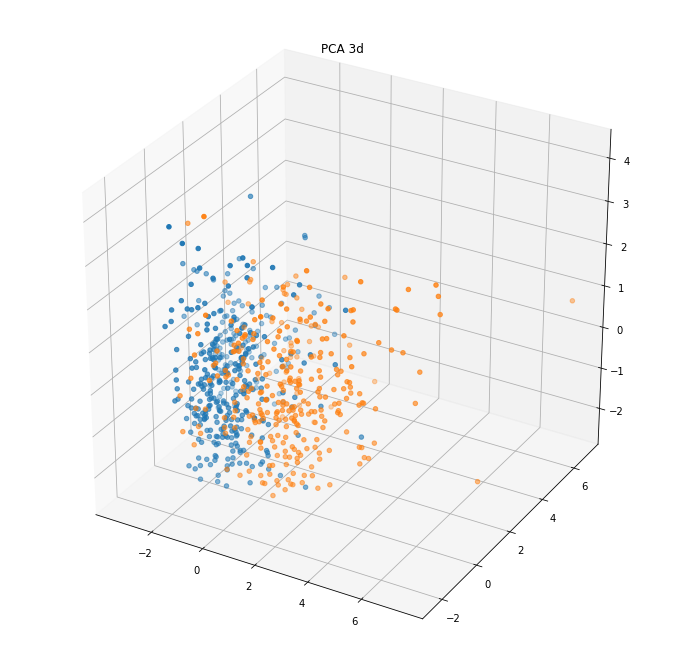

In [18]:
pca = PCA(n_components=3)
pca.fit(data.drop(columns=["A16"]))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

data_t = pca.transform(data[data["A16"]==1].drop(columns=["A16"]))
ax.scatter(data_t[:, 0], data_t[:, 1], data_t[:, 2])

data_t = pca.transform(data[data["A16"]==0].drop(columns=["A16"]))
ax.scatter(data_t[:, 0], data_t[:, 1], data_t[:, 2])

plt.title("PCA 3d")
plt.show()

## SVM

In [26]:
svm = SVC(kernel="linear", verbose=True, max_iter=10000000, C=math.inf)
svm.fit(data.drop(columns=["A16"]), data["A16"])

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=inf, kernel='linear', max_iter=10000000, verbose=True)

In [28]:
Y_predict = svm.predict(data.drop(columns=["A16"]))
Y_true = data["A16"]

In [31]:
accuracy_score(Y_true, Y_predict)

0.5710144927536231

# Simple Neural Network

In [49]:
class SimpleModel(keras.Model):
  def __init__(self):
    super().__init__()
    self.model = keras.models.Sequential([
                                    keras.layers.Dense(units=128, activation="relu", name="Dense_Layer_1"),
                                    keras.layers.Dense(units=16, activation="relu", name="Dense_Layer_2"),
                                    keras.layers.Dense(2, activation="softmax", name="Output_Layer")
    ])  

  def call(self, inputs):
    return self.model(inputs)

In [50]:
model = SimpleModel()

In [51]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [52]:
model.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 0.6165 - accuracy: 0.7531 - val_loss: 0.5042 - val_accuracy: 0.8429
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4691 - accuracy: 0.8610 - val_loss: 0.3850 - val_accuracy: 0.8714
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3882 - accuracy: 0.8776 - val_loss: 0.3179 - val_accuracy: 0.8714
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.3442 - accuracy: 0.8817 - val_loss: 0.2842 - val_accuracy: 0.8714
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.3204 - accuracy: 0.8880 - val_loss: 0.2769 - val_accuracy: 0.8714
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.3042 - accuracy: 0.8859 - val_loss: 0.2730 - val_accuracy: 0.8714
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.2939 - accuracy: 0.8921 - val_loss: 0.2704 - val_accuracy: 0.8714
Epoch 8/20
16/16 

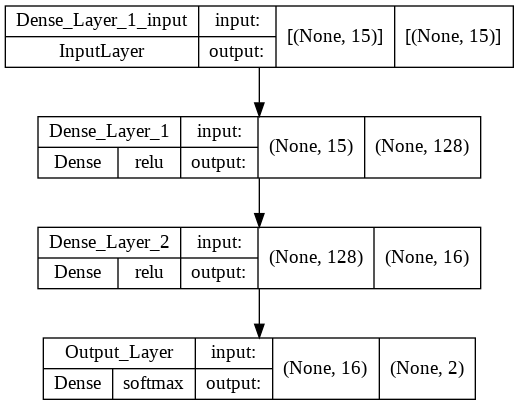

In [54]:
keras.utils.plot_model(model.model, show_layer_activations=True, show_shapes=True, show_layer_names=True)

# Fine Tuning Neural Network

In [63]:
class ComplexModel(keras.Model):
  def __init__(self, number_hidden_layers, number_hidden_units):
    super().__init__()

    if number_hidden_layers<0:
      raise Exception("The number of hidden layers must be a non-negetive number")

    if number_hidden_layers != len(number_hidden_units):
      raise Exception("The number of hidden layers must equal to the length of the number of hidden units list")

    self.model = keras.models.Sequential()

    for i in range(number_hidden_layers):
      self.model.add(keras.layers.Dense(units=number_hidden_units[i], activation="relu", name=f"Dense_Layer_{i+1}"))

    self.model.add(keras.layers.Dense(2, activation="softmax", name="Output_Layer"))

  def call(self, inputs):
    return self.model(inputs)

In [102]:
def train_and_evaluate(number_hidden_layers, number_hidden_units):
  model = ComplexModel(number_hidden_layers, number_hidden_units)
  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  model.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=0)
  train_accuracy = model.evaluate(X_train, Y_train, verbose=0)[1]
  validation_accuracy = model.evaluate(X_valid, Y_valid, verbose=0)[1]

  print(f"Train = {round(train_accuracy*100, 2)}, Validation = {round(validation_accuracy*100, 2)}")

## 0 hidden layers

In [104]:
train_and_evaluate(number_hidden_layers=0, number_hidden_units=[])

Train = 80.08, Validation = 88.57


## 1 hidden layer

In [106]:
for number_hidden_units_1 in [16, 32, 64, 128, 256]:
  print(f"number_hidden_units = [{number_hidden_units_1}] ", end="") 
  train_and_evaluate(number_hidden_layers=1, number_hidden_units=[number_hidden_units_1])

number_hidden_units = [16] Train = 87.97, Validation = 88.57
number_hidden_units = [32] Train = 89.0, Validation = 84.29
number_hidden_units = [64] Train = 89.0, Validation = 84.29
number_hidden_units = [128] Train = 90.04, Validation = 88.57
number_hidden_units = [256] Train = 91.49, Validation = 85.71


## 2 hidden layers

In [108]:
for number_hidden_units_1 in [16, 64, 128]:
  for number_hidden_units_2 in [16, 64, 128]:

    print(f"number_hidden_units = [{number_hidden_units_1}, {number_hidden_units_2}] ", end="") 

    train_and_evaluate(number_hidden_layers=2, number_hidden_units=[number_hidden_units_1, number_hidden_units_2])

number_hidden_units = [16, 16] Train = 88.8, Validation = 88.57
number_hidden_units = [16, 64] Train = 89.83, Validation = 84.29
number_hidden_units = [16, 128] Train = 89.63, Validation = 84.29
number_hidden_units = [64, 16] Train = 90.87, Validation = 85.71
number_hidden_units = [64, 64] Train = 91.7, Validation = 87.14
number_hidden_units = [64, 128] Train = 94.61, Validation = 84.29
number_hidden_units = [128, 16] Train = 92.53, Validation = 85.71
number_hidden_units = [128, 64] Train = 92.95, Validation = 82.86
number_hidden_units = [128, 128] Train = 94.61, Validation = 88.57


## 3 hidden layers

In [116]:
for number_hidden_units in [
                            [256, 128, 64],
                            [128, 64, 32],
                            [64, 32, 16],
                            [64, 128, 256],
                            [32, 64, 128],
                            [16, 32, 64],
                            [128, 128, 128],
                            [16, 16, 16],
                            [128, 16, 128],
                            [16, 128, 16]
]:

    print(f"number_hidden_units = {number_hidden_units} ", end="") 

    train_and_evaluate(number_hidden_layers=3, number_hidden_units=number_hidden_units)

number_hidden_units = [256, 128, 64] Train = 96.89, Validation = 85.71
number_hidden_units = [128, 64, 32] Train = 96.27, Validation = 85.71
number_hidden_units = [64, 32, 16] Train = 93.57, Validation = 88.57
number_hidden_units = [64, 128, 256] Train = 97.51, Validation = 85.71
number_hidden_units = [32, 64, 128] Train = 94.61, Validation = 87.14
number_hidden_units = [16, 32, 64] Train = 90.46, Validation = 85.71
number_hidden_units = [128, 128, 128] Train = 97.72, Validation = 88.57
number_hidden_units = [16, 16, 16] Train = 90.25, Validation = 84.29
number_hidden_units = [128, 16, 128] Train = 95.85, Validation = 85.71
number_hidden_units = [16, 128, 16] Train = 91.7, Validation = 87.14


## 4 hidden layers

In [113]:
for number_hidden_units in [
                            [128, 64, 32, 16],
                            [256, 128, 64, 32],
                            [256, 64, 32, 8],
                            [16, 32, 64, 128],
                            [32, 64, 128, 256],
                            [8, 32, 64, 256],
                            [256, 256, 256, 256],
                            [16, 16, 16, 16]
]:
  
      print(f"number_hidden_units = {number_hidden_units} ", end="") 

      train_and_evaluate(number_hidden_layers=4, number_hidden_units=number_hidden_units)

number_hidden_units = [128, 64, 32, 16] Train = 95.64, Validation = 84.29
number_hidden_units = [256, 128, 64, 32] Train = 93.78, Validation = 82.86
number_hidden_units = [256, 64, 32, 8] Train = 96.27, Validation = 87.14
number_hidden_units = [16, 32, 64, 128] Train = 92.74, Validation = 85.71
number_hidden_units = [32, 64, 128, 256] Train = 97.93, Validation = 82.86
number_hidden_units = [8, 32, 64, 256] Train = 91.49, Validation = 85.71
number_hidden_units = [256, 256, 256, 256] Train = 98.96, Validation = 85.71
number_hidden_units = [16, 16, 16, 16] Train = 90.66, Validation = 88.57


## 5 hidden layers

In [114]:
for number_hidden_units in [
                            [128, 64, 32, 16, 8],
                            [256, 128, 64, 32, 16],
                            [256, 128, 64, 16, 8],
                            [8, 16, 32, 64, 128],
                            [16, 32, 64, 128, 256],
                            [8, 16, 64, 128, 256],
                            [128, 128, 128, 128, 128],
                            [16, 16, 16, 16, 16],
                            [16, 32, 64, 32, 16],
                            [64, 32, 16, 32, 64]
]:
  
      print(f"number_hidden_units = {number_hidden_units} ", end="") 

      train_and_evaluate(number_hidden_layers=5, number_hidden_units=number_hidden_units)

number_hidden_units = [128, 64, 32, 16, 8] Train = 96.89, Validation = 81.43
number_hidden_units = [256, 128, 64, 32, 16] Train = 97.1, Validation = 84.29
number_hidden_units = [256, 128, 64, 16, 8] Train = 97.1, Validation = 85.71
number_hidden_units = [8, 16, 32, 64, 128] Train = 91.7, Validation = 82.86
number_hidden_units = [16, 32, 64, 128, 256] Train = 96.89, Validation = 85.71
number_hidden_units = [8, 16, 64, 128, 256] Train = 90.04, Validation = 85.71
number_hidden_units = [128, 128, 128, 128, 128] Train = 98.76, Validation = 87.14
number_hidden_units = [16, 16, 16, 16, 16] Train = 89.63, Validation = 84.29
number_hidden_units = [16, 32, 64, 32, 16] Train = 92.95, Validation = 87.14
number_hidden_units = [64, 32, 16, 32, 64] Train = 96.27, Validation = 90.0


## 6 hidden layers

In [115]:
for number_hidden_units in [
                            [128, 64, 32, 16, 8, 4],
                            [256, 128, 64, 32, 16, 8],
                            [4, 8, 16, 32, 64, 128],
                            [8, 16, 32, 64, 128, 256],
                            [16, 32, 64, 64, 32, 16],
                            [64, 32, 16, 16, 32, 64],
                            [128, 128, 128, 128, 128, 128],
                            [16, 16, 16, 16, 16, 16]

]:
  
      print(f"number_hidden_units = {number_hidden_units} ", end="") 

      train_and_evaluate(number_hidden_layers=6, number_hidden_units=number_hidden_units)

number_hidden_units = [128, 64, 32, 16, 8, 4] Train = 96.68, Validation = 87.14
number_hidden_units = [256, 128, 64, 32, 16, 8] Train = 98.13, Validation = 82.86
number_hidden_units = [4, 8, 16, 32, 64, 128] Train = 86.93, Validation = 85.71
number_hidden_units = [8, 16, 32, 64, 128, 256] Train = 90.87, Validation = 87.14
number_hidden_units = [16, 32, 64, 64, 32, 16] Train = 92.32, Validation = 91.43
number_hidden_units = [64, 32, 16, 16, 32, 64] Train = 96.06, Validation = 87.14
number_hidden_units = [128, 128, 128, 128, 128, 128] Train = 99.38, Validation = 87.14
number_hidden_units = [16, 16, 16, 16, 16, 16] Train = 90.87, Validation = 85.71


## 7 hidden layers

In [117]:
for number_hidden_units in [
                            [256, 128, 64, 32, 16, 8, 4],
                            [4, 8, 16, 32, 64, 128, 256],
                            [16, 32, 64, 128, 64, 32, 16],
                            [128, 64, 32, 16, 32, 64, 128],
                            [128, 128, 128, 128, 128, 128, 128],
                            [16, 16, 16, 16, 16, 16, 16]

]:
  
      print(f"number_hidden_units = {number_hidden_units} ", end="") 

      train_and_evaluate(number_hidden_layers=7, number_hidden_units=number_hidden_units)

number_hidden_units = [256, 128, 64, 32, 16, 8, 4] Train = 95.85, Validation = 88.57
number_hidden_units = [4, 8, 16, 32, 64, 128, 256] Train = 80.08, Validation = 80.0
number_hidden_units = [16, 32, 64, 128, 64, 32, 16] Train = 94.81, Validation = 87.14
number_hidden_units = [128, 64, 32, 16, 32, 64, 128] Train = 97.72, Validation = 90.0
number_hidden_units = [128, 128, 128, 128, 128, 128, 128] Train = 98.55, Validation = 87.14
number_hidden_units = [16, 16, 16, 16, 16, 16, 16] Train = 91.08, Validation = 90.0


## Best Model

In [122]:
model = ComplexModel(number_hidden_layers=6, number_hidden_units=[16, 32, 64, 64, 32, 16])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=1)

model.evaluate(x=X_test, y=Y_test, verbose=1)

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 0.6785 - accuracy: 0.6203 - val_loss: 0.6091 - val_accuracy: 0.7857
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.7344 - val_loss: 0.4920 - val_accuracy: 0.8714
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4943 - accuracy: 0.8029 - val_loss: 0.3551 - val_accuracy: 0.8857
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8382 - val_loss: 0.2851 - val_accuracy: 0.9000
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.3687 - accuracy: 0.8527 - val_loss: 0.2616 - val_accuracy: 0.9143
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3370 - accuracy: 0.8734 - val_loss: 0.2453 - val_accuracy: 0.9143
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.8776 - val_loss: 0.2466 - val_accuracy: 0.9143
Epoch 8/20
16/16 [=

[0.4272124767303467, 0.8550724387168884]

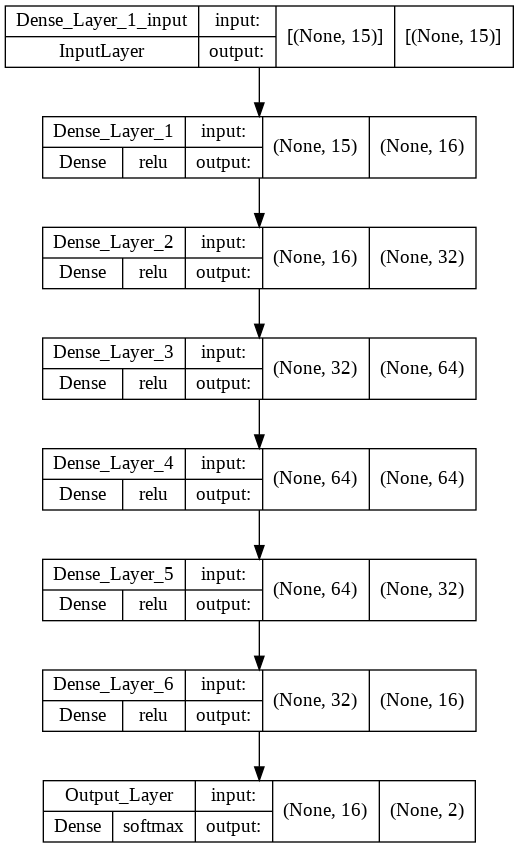

In [119]:
keras.utils.plot_model(model.model, show_layer_activations=True, show_shapes=True, show_layer_names=True)

# Overfitting Neural Network

In [134]:
model = ComplexModel(number_hidden_layers=8, number_hidden_units=[512]*8)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_valid, Y_valid), verbose=1)

model.evaluate(x=X_test, y=Y_test, verbose=1)

Epoch 1/50
16/16 [==============================] - 3s 73ms/step - loss: 0.4904 - accuracy: 0.7988 - val_loss: 0.2808 - val_accuracy: 0.9000
Epoch 2/50
16/16 [==============================] - 1s 66ms/step - loss: 0.3401 - accuracy: 0.8755 - val_loss: 0.3252 - val_accuracy: 0.8429
Epoch 3/50
16/16 [==============================] - 1s 64ms/step - loss: 0.3280 - accuracy: 0.8921 - val_loss: 0.3051 - val_accuracy: 0.9000
Epoch 4/50
16/16 [==============================] - 1s 51ms/step - loss: 0.2761 - accuracy: 0.9108 - val_loss: 0.2809 - val_accuracy: 0.8857
Epoch 5/50
16/16 [==============================] - 1s 39ms/step - loss: 0.2186 - accuracy: 0.9274 - val_loss: 0.5007 - val_accuracy: 0.8143
Epoch 6/50
16/16 [==============================] - 1s 45ms/step - loss: 0.2139 - accuracy: 0.9253 - val_loss: 0.4974 - val_accuracy: 0.8286
Epoch 7/50
16/16 [==============================] - 1s 43ms/step - loss: 0.2232 - accuracy: 0.9212 - val_loss: 0.4729 - val_accuracy: 0.7714
Epoch 8/50
16

[3.4461801052093506, 0.8115941882133484]

In [135]:
model.evaluate(x=X_train, y=Y_train, verbose=1)
model.evaluate(x=X_valid, y=Y_valid, verbose=1)
model.evaluate(x=X_test, y=Y_test, verbose=1)

5/5 [==============================] - 0s 8ms/step - loss: 3.4462 - accuracy: 0.8116


[3.4461801052093506, 0.8115941882133484]